## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling Race](#Regression-Modeling-Race)  

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Texas data and sae to a dataframe.
tx_df = pd.read_csv('../data/texas_combined_cleaned_WITH_Census_FA.csv')

In [3]:
# Display the first few rows of the dataframe.
tx_df.head(3)

,county_name,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,anderson,2922.0,39,0.013347,57863,10142,34312,12127,158,319,...,1432,422,240,43355,55852,16868,26621,36865,26890,54.452632
1,andrews,567.0,10,0.017637,17818,9979,7215,321,0,63,...,1214,398,352,74233,94962,31190,40478,72970,35194,11.872960
2,angelina,2277.0,90,0.039526,87607,19174,53216,12834,107,987,...,3257,985,639,47714,61152,22322,27411,41488,32622,109.813207


In [4]:
# Display information about the dataframe.
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 54 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   county_name                                                254 non-null    object 
 1   total_cases                                                254 non-null    float64
 2   total_fatalities                                           254 non-null    int64  
 3   death_rate                                                 254 non-null    float64
 4   race_pop                                                   254 non-null    int64  
 5   race_pop_hispanic_or_latino_of_any_race                    254 non-null    int64  
 6   race_pop_white_alone                                       254 non-null    int64  
 7   race_pop_black_or_african_american_alone                   254 non-null    int64  
 8   race_pop_a

In [5]:
# Set the county name to the index.
tx_df = tx_df.set_index('county_name')

# Regression Modeling Insurance

In [6]:
list(tx_df.columns)

['total_cases',
 'total_fatalities',
 'death_rate',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop_cov_no',
 'inc_hhlds',
 'inc_hhl

In [7]:
# Create a subset of demographic columns for modeling.
# Extract columns for model.
ins_mod_cols = [
    'health_ins_noninst_pop',
    'health_ins_noninst_pop_cov_yes',
    'health_ins_noninst_pop_private',
    'health_ins_noninst_pop_public',
    'health_ins_noninst_pop_cov_no',
    'death_rate'
]

In [8]:
# Create a dataframe
tx_ins = tx_df[ins_mod_cols]

### Reg Model: All Households

In [9]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('health_ins_noninst_pop_cov'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['health_ins_noninst_pop']
    return

In [10]:
# Apply the function to the numbers dataframe
to_percentage(tx_ins)

In [11]:
list(tx_ins.columns)

['health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop_cov_no',
 'death_rate',
 'percent_health_ins_noninst_pop_cov_yes',
 'percent_health_ins_noninst_pop_cov_no']

In [14]:
X = tx_ins[[
    'percent_health_ins_noninst_pop_cov_yes',
    'percent_health_ins_noninst_pop_cov_no',
]]

y = tx_ins['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [16]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [17]:
X_train.shape, y_test.shape

((190, 2), (64,))

In [18]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.22370736550448997

# Correlations income

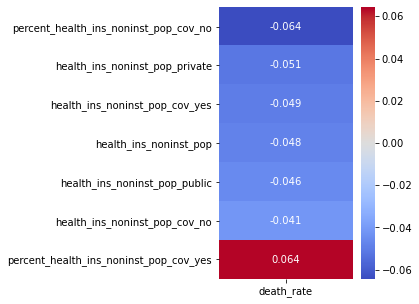

In [21]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = tx_ins.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 5))
sns.heatmap(corr[['death_rate']].sort_values(by='death_rate').iloc[:-1], annot=True, cmap = 'coolwarm');